<a href="https://colab.research.google.com/github/softstat/-/blob/main/seoul_park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 서울시 공원의 분포와 이용자 수 사이의 상관관계



1.   서울시 한강 공원 분포
2.   한강 공원 분포에 따른 이용 인원수
3.   주변 공원들로의 인원 분산




# 1. 서울시 한강공원 분포

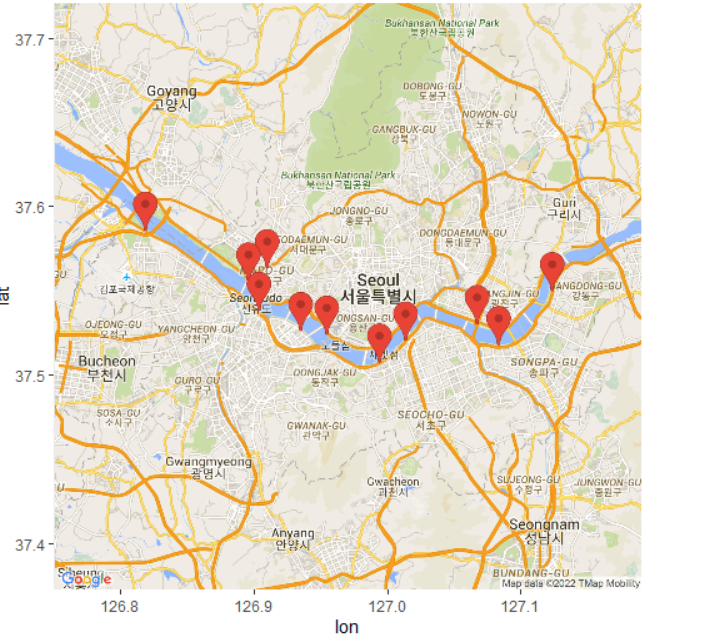

## 데이터 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dpath = "./drive/MyDrive/hangang/"


In [ ]:
pop = pd.read_csv(dpath + "seoul_park_pop.csv", sep=",",thousands=',')
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기간          12 non-null     int64 
 1   구분          12 non-null     object
 2   합계          12 non-null     int64 
 3   일반이용자       12 non-null     int64 
 4   운동시설 등      12 non-null     int64 
 5   자전거 등       12 non-null     int64 
 6   주요행사 및 마라톤  12 non-null     int64 
 7   특화공원        12 non-null     object
 8   기타          12 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 992.0+ bytes


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,142 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [ ]:
plt.rc("font",family="NanumGothic")
mpl.rcParams["axes.unicode_minus"]=False

In [ ]:
pop

,기간,구분,합계,일반이용자,운동시설 등,자전거 등,주요행사 및 마라톤,특화공원,기타
0,2020,합계,56328303,23200836,8887172,15328169,788966,"7,183,732",939428
1,2020,광나루,3384139,1609228,750875,959667,11668,-,52701
2,2020,잠실,3798503,1799447,458840,1511651,18099,-,10466
3,2020,뚝섬,17472395,7762519,3541975,3531592,102394,"2,073,646",460269
4,2020,잠원,2381828,855951,805714,703172,340,-,16651
5,2020,반포,4776082,1692637,681368,1217418,151628,"956,914",76117
6,2020,이촌,2291528,920109,589686,706441,25730,-,49562
7,2020,여의도,9518870,2997357,403376,1864829,240320,"3,833,593",179395
8,2020,양화,3647283,1730228,320608,1554992,34115,-,7340
9,2020,망원,2384556,986441,484679,779477,115122,-,18837


In [ ]:
# 데이터 확인(12행,9열)
pop.shape

(12, 9)

In [ ]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기간          12 non-null     int64 
 1   구분          12 non-null     object
 2   합계          12 non-null     int64 
 3   일반이용자       12 non-null     int64 
 4   운동시설 등      12 non-null     int64 
 5   자전거 등       12 non-null     int64 
 6   주요행사 및 마라톤  12 non-null     int64 
 7   특화공원        12 non-null     object
 8   기타          12 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 992.0+ bytes


In [ ]:
# 구분이 합계인 행 삭제
pop=pop[pop["구분"]!="합계"]
pop.head()

,기간,구분,합계,일반이용자,운동시설 등,자전거 등,주요행사 및 마라톤,특화공원,기타
1,2020,광나루,3384139,1609228,750875,959667,11668,-,52701
2,2020,잠실,3798503,1799447,458840,1511651,18099,-,10466
3,2020,뚝섬,17472395,7762519,3541975,3531592,102394,"2,073,646",460269
4,2020,잠원,2381828,855951,805714,703172,340,-,16651
5,2020,반포,4776082,1692637,681368,1217418,151628,"956,914",76117


In [ ]:
# 주요행사 및 마라톤 열 삭제
pop.drop("주요행사 및 마라톤",axis=1,inplace=True)
pop.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,기간,구분,합계,일반이용자,운동시설 등,자전거 등,특화공원,기타
1,2020,광나루,3384139,1609228,750875,959667,-,52701
2,2020,잠실,3798503,1799447,458840,1511651,-,10466
3,2020,뚝섬,17472395,7762519,3541975,3531592,"2,073,646",460269
4,2020,잠원,2381828,855951,805714,703172,-,16651
5,2020,반포,4776082,1692637,681368,1217418,"956,914",76117


In [ ]:
# 특화공원 열 삭제
pop.drop("특화공원",axis=1,inplace=True)
pop.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,기간,구분,합계,일반이용자,운동시설 등,자전거 등,기타
1,2020,광나루,3384139,1609228,750875,959667,52701
2,2020,잠실,3798503,1799447,458840,1511651,10466
3,2020,뚝섬,17472395,7762519,3541975,3531592,460269
4,2020,잠원,2381828,855951,805714,703172,16651
5,2020,반포,4776082,1692637,681368,1217418,76117


In [ ]:
# 기타 열 삭제
pop.drop("기타",axis=1,inplace=True)
pop.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,기간,구분,합계,일반이용자,운동시설 등,자전거 등
1,2020,광나루,3384139,1609228,750875,959667
2,2020,잠실,3798503,1799447,458840,1511651
3,2020,뚝섬,17472395,7762519,3541975,3531592
4,2020,잠원,2381828,855951,805714,703172
5,2020,반포,4776082,1692637,681368,1217418


In [ ]:
pop

,기간,구분,합계,일반이용자,운동시설 등,자전거 등
1,2020,광나루,3384139,1609228,750875,959667
2,2020,잠실,3798503,1799447,458840,1511651
3,2020,뚝섬,17472395,7762519,3541975,3531592
4,2020,잠원,2381828,855951,805714,703172
5,2020,반포,4776082,1692637,681368,1217418
6,2020,이촌,2291528,920109,589686,706441
7,2020,여의도,9518870,2997357,403376,1864829
8,2020,양화,3647283,1730228,320608,1554992
9,2020,망원,2384556,986441,484679,779477
10,2020,난지,2941988,1464193,231300,859164


# 2. 한강 공원 분포에 따른 이용 인원수

### 막대그래프를 이용한 공원 이용자 수 파악

In [ ]:
# pop 데이터에서 합계 기준으로 정렬해서 이용자 수가 가장 많은 5개 공원 확인
pop.sort_values("합계",ascending=False).head(5)

,기간,구분,합계,일반이용자,운동시설 등,자전거 등
3,2020,뚝섬,17472395,7762519,3541975,3531592
7,2020,여의도,9518870,2997357,403376,1864829
5,2020,반포,4776082,1692637,681368,1217418
2,2020,잠실,3798503,1799447,458840,1511651
11,2020,강서,3731131,1382726,618751,1639766


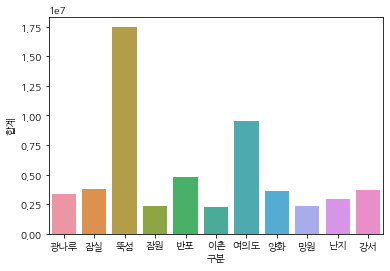

In [ ]:
sns.barplot(x="구분",y="합계",data=pop);

### 일반 이용자수 파악

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


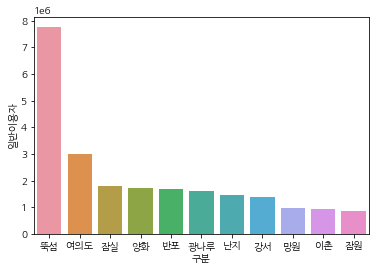

In [ ]:
#일반 이용자수 많은 공원 부터 표시
pop.sort_values("일반이용자",ascending=False,inplace=True)
sns.barplot(x="구분",y="일반이용자",data=pop);

### 운동 시설 이용자 수 파악

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


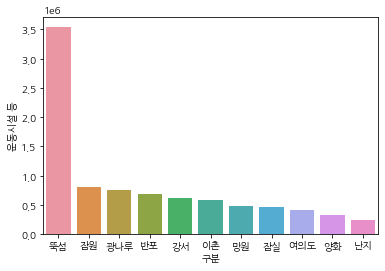

In [ ]:
#운동 시설 이용자 수 많은 공원부터 표시
pop.sort_values("운동시설 등",ascending=False,inplace=True)
sns.barplot(x="구분",y="운동시설 등",data=pop);

### 자전거 이용자 수 파악

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


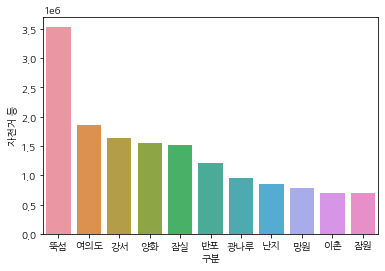

In [ ]:
#자전거 이용자 수 많은 공원부터 표시
pop.sort_values("자전거 등",ascending=False,inplace=True)
sns.barplot(x="구분",y="자전거 등",data=pop);

# 3. 인구수와 공원 이용자 간의 상관관계

한강 공원을 이용하는 사람들이 살고 있는 구의 인구와 그에 따른 인구 비율 비교한 후 이유 파악

각 구에 살고 있는 인구수가 많다면 한강공원을 이용하는 숫자가 많을 것
그렇지 않다면 왜 그런지 분석


 



1.   광나루(강동구)
2.   잠실(송파구)
3.   뚝섬(광진구)
4.   잠원(서초구)
5.   반포(서초구)
6.   이촌(용산구)
7.   여의도(영등포구)
8.   양화(영등포구)
9.   망원(마포구)
10.  난지(마포구)
11.  강서(강서구)



In [ ]:
#서울시 구 별 공원 데이터 불러오기
import folium
df=pd.read_csv(dpath+"서울시주요공원현황.csv",encoding='euc-kr')
df.head()

,연번,공원명,지역,공원주소,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84)
0,1,남산도시자연공원,중구,서울특별시 중구 삼일대로 231(예장동),02-3783-5900,198364.107,450395.554,126.990377,37.550140
1,2,길동생태공원,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),02-489-2770,213554.120,448852.675,127.154779,37.540394
2,3,서울대공원,과천시,경기도 과천시 대공원광장로 102,02-500-7032,200994.267,437163.981,127.019847,37.426449
3,4,서울숲,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),02-460-2905,203695.432,449290.726,127.041798,37.543072
4,5,월드컵공원,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),02-300-5500,190658.070,451598.831,126.878907,37.571805


In [ ]:
x=df.loc[:,"공원주소":"Y좌표(GRS80TM)"].columns

In [ ]:
df.drop(x,axis=1,inplace=True)
df.head()

,연번,공원명,지역,X좌표(WGS84),Y좌표(WGS84)
0,1,남산도시자연공원,중구,126.990377,37.550140
1,2,길동생태공원,강동구,127.154779,37.540394
2,3,서울대공원,과천시,127.019847,37.426449
3,4,서울숲,성동구,127.041798,37.543072
4,5,월드컵공원,마포구,126.878907,37.571805


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연번          132 non-null    int64  
 1   공원명         132 non-null    object 
 2   지역          132 non-null    object 
 3   X좌표(WGS84)  132 non-null    float64
 4   Y좌표(WGS84)  132 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.3+ KB


In [ ]:
df["지역"].value_counts()

종로구     12
강서구      9
송파구      7
은평구      7
강동구      7
동작구      7
강남구      7
서초구      6
도봉구      6
중랑구      6
성동구      5
영등포구     5
중구       5
양천구      5
마포구      5
금천구      4
동대문구     4
강북구      4
서대문구     4
구로구      4
성북구      3
노원구      3
용산구      2
관악구      2
광진구      2
과천시      1
Name: 지역, dtype: int64

In [ ]:
df1=df.loc[(df["지역"]=="강동구")|(df["지역"]=="송파구")|(df["지역"]=="광진구")|(df["지역"]=="서초구")|(df["지역"]=="용산구")|(df["지역"]=="영등포구")|(df["지역"]=="마포구")|(df["지역"]=="강서구")]

In [ ]:
df1.head(10)

,연번,공원명,지역,X좌표(WGS84),Y좌표(WGS84)
1,2,길동생태공원,강동구,127.154779,37.540394
4,5,월드컵공원,마포구,126.878907,37.571805
7,8,중마루근린공원,영등포구,126.911267,37.519832
9,10,매화근린공원,강서구,126.861150,37.557583
11,12,샛마을근린공원,강동구,127.147162,37.550481
12,13,여의도근린공원,영등포구,126.922377,37.526129
15,16,영등포근린공원,영등포구,126.910662,37.515423
17,18,어린이대공원,광진구,127.080921,37.549899
18,19,천호근린공원,강동구,127.126345,37.544474
19,20,용산가족공원,용산구,126.983335,37.522226


In [ ]:
df1.tail(10)

,연번,공원명,지역,X좌표(WGS84),Y좌표(WGS84)
104,105,문정근린공원,송파구,127.127582,37.486216
105,106,문화예술공원,서초구,127.030517,37.467654
111,112,청계산도시자연공원,서초구,127.042473,37.422435
112,113,개화근린공원,강서구,126.806828,37.581392
113,114,아차산생태공원,광진구,127.101003,37.551714
114,115,인능산도시자연공원,서초구,127.066663,37.448211
115,116,구룡산,서초구,127.061567,37.468947
116,117,우면산도시자연공원,서초구,127.009132,37.470484
122,123,허브천문공원,강동구,127.153395,37.537272
128,129,문화비축기지,마포구,126.893246,37.571718


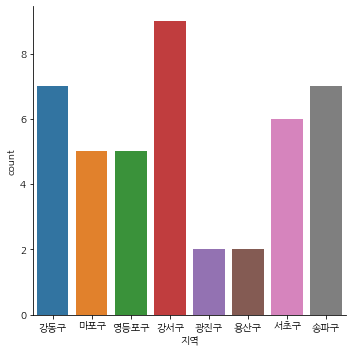

In [ ]:
sns.catplot(kind="count",x="지역",data=df1);

In [ ]:
#인구 데이터 불러오기

seoul_pop=pd.read_table(dpath + "report (3).txt",skiprows=2,thousands=",",usecols=["기간","자치구","계","계.1","계.2","65세이상고령자"])
seoul_pop.head()

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2020,합계,9911088,9668465,242623,1568331
1,2020,종로구,158996,149384,9612,28507
2,2020,중구,134635,125240,9395,24495
3,2020,용산구,244645,230040,14605,40247
4,2020,성동구,300505,293556,6949,45603


In [ ]:
seoul_pop=seoul_pop.loc[:,["자치구","계","계.1","계.2","65세이상고령자"]]
seoul_pop.rename(columns={"계":"인구수","계.1":"한국인","계.2":"외국인","65세이상고령자":"고령자"},inplace=True)
seoul_pop.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,9911088,9668465,242623,1568331
1,종로구,158996,149384,9612,28507
2,중구,134635,125240,9395,24495
3,용산구,244645,230040,14605,40247
4,성동구,300505,293556,6949,45603


In [ ]:
#자치구가 합계인 행 삭제
seoul_pop = seoul_pop[seoul_pop["자치구"]!="합계"]
print(seoul_pop.shape)
print(seoul_pop.head())

(25, 5)
   자치구     인구수     한국인    외국인    고령자
1  종로구  158996  149384   9612  28507
2   중구  134635  125240   9395  24495
3  용산구  244645  230040  14605  40247
4  성동구  300505  293556   6949  45603
5  광진구  360109  346682  13427  50560


In [ ]:
seoul_pop_1=seoul_pop.loc[(seoul_pop["자치구"]=="강동구")|(seoul_pop["자치구"]=="송파구")|(seoul_pop["자치구"]=="광진구")|(seoul_pop["자치구"]=="서초구")|(seoul_pop["자치구"]=="용산구")|(seoul_pop["자치구"]=="영등포구")|(seoul_pop["자치구"]=="마포구")|(seoul_pop["자치구"]=="강서구")]
seoul_pop_1.head(10)

,자치구,인구수,한국인,외국인,고령자
3,용산구,244645,230040,14605,40247
5,광진구,360109,346682,13427,50560
14,마포구,381858,371890,9968,54331
16,강서구,585901,580185,5716,88984
19,영등포구,407367,379480,27887,61688
22,서초구,429025,425126,3899,60169
24,송파구,673926,667960,5966,93483
25,강동구,463998,459970,4028,70019


In [ ]:
y=seoul_pop_1.loc[:,"한국인":"고령자"].columns

In [ ]:
seoul_pop_1.drop(y,axis=1,inplace=True)
seoul_pop_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,자치구,인구수
3,용산구,244645
5,광진구,360109
14,마포구,381858
16,강서구,585901
19,영등포구,407367


In [ ]:
pop

,기간,구분,합계,일반이용자,운동시설 등,자전거 등
3,2020,뚝섬,17472395,7762519,3541975,3531592
7,2020,여의도,9518870,2997357,403376,1864829
11,2020,강서,3731131,1382726,618751,1639766
8,2020,양화,3647283,1730228,320608,1554992
2,2020,잠실,3798503,1799447,458840,1511651
5,2020,반포,4776082,1692637,681368,1217418
1,2020,광나루,3384139,1609228,750875,959667
10,2020,난지,2941988,1464193,231300,859164
9,2020,망원,2384556,986441,484679,779477
6,2020,이촌,2291528,920109,589686,706441


In [ ]:
pop['구분'] = pop['구분'].map({'광나루':'강동구',
                             '잠실':'송파구',
                             '뚝섬':'광진구',
                           '잠원':'서초구',
                           '반포':'서초구',
                           '이촌':'용산구',
                           '여의도':'영등포구',
                           '양화':'영등포구',
                           '망원':'마포구',
                           '난지':'마포구',
                           '강서':'강서구'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
pop

,기간,구분,합계,일반이용자,운동시설 등,자전거 등
1,2020,강동구,3384139,1609228,750875,959667
2,2020,송파구,3798503,1799447,458840,1511651
3,2020,광진구,17472395,7762519,3541975,3531592
4,2020,서초구,2381828,855951,805714,703172
5,2020,서초구,4776082,1692637,681368,1217418
6,2020,용산구,2291528,920109,589686,706441
7,2020,영등포구,9518870,2997357,403376,1864829
8,2020,영등포구,3647283,1730228,320608,1554992
9,2020,마포구,2384556,986441,484679,779477
10,2020,마포구,2941988,1464193,231300,859164


In [ ]:
# 중복 데이터 평균으로 계산(영등포구,마포구,서초구)
pop_average=pop.groupby(['구분'],as_index=False).mean()

In [ ]:
final=pd.merge(seoul_pop_1,pop_average,left_on="자치구",right_on="구분")
final.head()

,자치구,인구수,구분,기간,합계,일반이용자,운동시설 등,자전거 등
0,용산구,244645,용산구,2020.0,2291528.0,920109.0,589686.0,706441.0
1,광진구,360109,광진구,2020.0,17472395.0,7762519.0,3541975.0,3531592.0
2,마포구,381858,마포구,2020.0,2663272.0,1225317.0,357989.5,819320.5
3,강서구,585901,강서구,2020.0,3731131.0,1382726.0,618751.0,1639766.0
4,영등포구,407367,영등포구,2020.0,6583076.5,2363792.5,361992.0,1709910.5


In [ ]:
z=final.loc[:,"구분":"기간"].columns

In [ ]:
final.drop(z,axis=1,inplace=True)
final.head()

,자치구,인구수,합계,일반이용자,운동시설 등,자전거 등
0,용산구,244645,2291528.0,920109.0,589686.0,706441.0
1,광진구,360109,17472395.0,7762519.0,3541975.0,3531592.0
2,마포구,381858,2663272.0,1225317.0,357989.5,819320.5
3,강서구,585901,3731131.0,1382726.0,618751.0,1639766.0
4,영등포구,407367,6583076.5,2363792.5,361992.0,1709910.5


In [ ]:
final[["인구수","일반이용자","운동시설 등","자전거 등"]].corr(method="spearman")

,인구수,일반이용자,운동시설 등,자전거 등
인구수,1.000000,0.238095,0.000000,0.214286
일반이용자,0.238095,1.000000,0.309524,0.880952
운동시설 등,0.000000,0.309524,1.000000,0.285714
자전거 등,0.214286,0.880952,0.285714,1.000000


In [ ]:
# 이상치 제거 후 다시 계산(광진구,영등포구 제외)
final_1=final.drop(index=[1,4])
final_1

,자치구,인구수,합계,일반이용자,운동시설 등,자전거 등
0,용산구,244645,2291528.0,920109.0,589686.0,706441.0
2,마포구,381858,2663272.0,1225317.0,357989.5,819320.5
3,강서구,585901,3731131.0,1382726.0,618751.0,1639766.0
5,서초구,429025,3578955.0,1274294.0,743541.0,960295.0
6,송파구,673926,3798503.0,1799447.0,458840.0,1511651.0
7,강동구,463998,3384139.0,1609228.0,750875.0,959667.0


In [ ]:
#인구수,합계,일반이용자,자전거 이용자 상관관계 있지만 운동시설과는 상관이 없는 것으로 나타남
final_1[["인구수","합계","일반이용자","운동시설 등","자전거 등"]].corr(method="spearman")

,인구수,합계,일반이용자,운동시설 등,자전거 등
인구수,1.000000,0.942857,0.942857,0.142857,0.885714
합계,0.942857,1.000000,0.828571,0.085714,0.942857
일반이용자,0.942857,0.828571,1.000000,0.257143,0.714286
운동시설 등,0.142857,0.085714,0.257143,1.000000,0.200000
자전거 등,0.885714,0.942857,0.714286,0.200000,1.000000


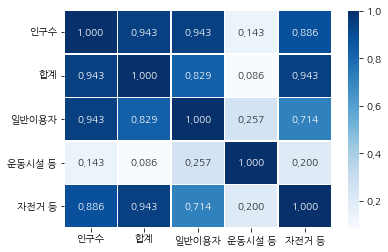

In [ ]:
sns.heatmap(final_1[["인구수","합계","일반이용자","운동시설 등", "자전거 등"]].corr(method="spearman"),annot=True,fmt=".3f", linewidth=.5,cmap="Blues");

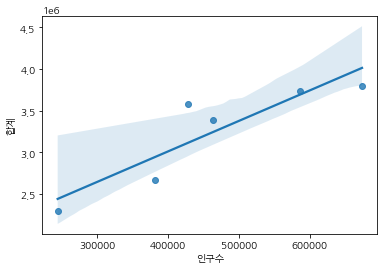

In [ ]:
# 인구수 대비 전체 이용자 수에 대한 회귀도표 그리고 90% 신뢰구간 표기하기
sns.regplot(x="인구수",y="합계",data=final_1,ci=90);

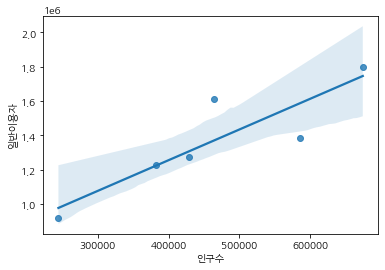

In [ ]:
# 인구수 대비 일반 이용자 수에 대한 회귀도표 그리고 90% 신뢰구간 표기하기
sns.regplot(x="인구수",y="일반이용자",data=final_1,ci=90);

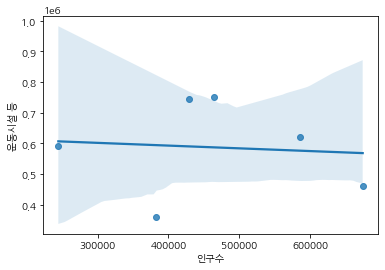

In [ ]:
# 인구수 대비 운동시설 이용자 수에 대한 회귀도표 그리고 90% 신뢰구간 표기하기
sns.regplot(x="인구수",y="운동시설 등",data=final_1,ci=90);